In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [2]:
df_house = pd.read_csv("data/raw/kc_house_data.csv")
df_private_schools = pd.read_csv("data/raw/Private_Schools.csv")
df_public_schools = pd.read_csv("data/raw/Public_Schools.csv")
df_hospitals = pd.read_csv("data/raw/Hospitals.csv")
df_incidents = pd.read_csv("data/raw/all_incidents.csv")


In [3]:
df_house.info()
df_house.head()
df_public_schools.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-9.844095e+06,5.230976e+06,1,170330000017,ALDEN-HEBRON HIGH SCHOOL,9604 ILLINOIS ST,HEBRON,IL,60034,9618,...,IMAGERY/OTHER,2010/08/27 00:00:00,NOT AVAILABLE,HIGH,112,09,12,1703300,11,NOT AVAILABLE
1,-9.007027e+06,4.195442e+06,2,370297001287,WESTERLY HILLS ACADEMY,4420 DENVER AVE,CHARLOTTE,NC,28208,3699,...,IMAGERY/OTHER,2016/08/22 00:00:00,http://schools.cms.k12.nc.us/westerlyhillsES,ELEMENTARY,495,KG,08,3702970,45,NOT AVAILABLE
2,-9.580426e+06,4.792069e+06,3,180369000584,NORTHWOOD ELEMENTARY SCHOOL,965 GRIZZLY CUB DR,FRANKLIN,IN,46131,1364,...,IMAGERY/OTHER,2010/08/02 00:00:00,NOT AVAILABLE,ELEMENTARY,478,PK,04,1803690,25,NOT AVAILABLE
3,-1.243297e+07,3.927588e+06,4,40187003479,DR. GARY AND ANNETTE AUXIER ELEMENTARY SCHOOL,22700 S. POWER RD.,QUEEN CREEK,AZ,85298,NOT AVAILABLE,...,IMAGERY/OTHER,2018/10/24 00:00:00,NOT AVAILABLE,ELEMENTARY,958,PK,06,401870,51,NOT AVAILABLE
4,-1.243258e+07,3.924831e+06,5,40187003483,DR. CAMILLE CASTEEL HIGH SCHOOL,24901 S. POWER RD.,QUEEN CREEK,AZ,85142,NOT AVAILABLE,...,IMAGERY/OTHER,2018/10/24 00:00:00,NOT AVAILABLE,HIGH,2294,07,12,401870,115,NOT AVAILABLE


In [4]:
# ZIP codes in house dataset, as 5-character strings
king_zips = df_house["zipcode"].astype(str).str.zfill(5).unique()
len(king_zips), sorted(king_zips)[:10]


(70,
 ['98001',
  '98002',
  '98003',
  '98004',
  '98005',
  '98006',
  '98007',
  '98008',
  '98010',
  '98011'])

In [ ]:

df_private_schools["ZIP"] = df_private_schools["ZIP"].astype(str).str.zfill(5)
df_public_schools["ZIP"] = df_public_schools["ZIP"].astype(str).str.zfill(5)
df_hospitals["ZIP"] = df_hospitals["ZIP"].astype(str).str.zfill(5)

df_private_schools_king = df_private_schools[df_private_schools["ZIP"].isin(king_zips)]
df_public_schools_king = df_public_schools[df_public_schools["ZIP"].isin(king_zips)]
df_hospitals_king = df_hospitals[df_hospitals["ZIP"].isin(king_zips)]

len(df_private_schools_king), len(df_public_schools_king), len(df_hospitals_king)


(241, 513, 27)

In [6]:
schools_public_zip = (
    df_public_schools_king
    .groupby("ZIP")
    .size()
    .reset_index(name="public_school_count")
)

schools_private_zip = (
    df_private_schools_king
    .groupby("ZIP")
    .size()
    .reset_index(name="private_school_count")
)

hospitals_zip = (
    df_hospitals_king
    .groupby("ZIP")
    .size()
    .reset_index(name="hospital_count")
)

schools_public_zip.head()


,ZIP,public_school_count
0,98001,10
1,98002,10
2,98003,19
3,98004,4
4,98005,6


In [ ]:
# ZIP-Level Merging of Livability Indicators into Housing Data
df_house["zipcode_str"] = df_house["zipcode"].astype(str).str.zfill(5)

df_merged = df_house.merge(
    schools_public_zip,
    left_on="zipcode_str",
    right_on="ZIP",
    how="left"
)

df_merged = df_merged.merge(
    schools_private_zip,
    left_on="zipcode_str",
    right_on="ZIP",
    how="left",
    suffixes=("", "_priv")
)

df_merged = df_merged.merge(
    hospitals_zip,
    left_on="zipcode_str",
    right_on="ZIP",
    how="left",
    suffixes=("", "_hosp")
)

# Clean up duplicate ZIP columns
cols_to_drop = [c for c in df_merged.columns if c.startswith("ZIP")]
df_merged = df_merged.drop(columns=cols_to_drop)

# Replace NaNs (no schools/hospitals in that ZIP) with 0
for col in ["public_school_count", "private_school_count", "hospital_count"]:
    df_merged[col] = df_merged[col].fillna(0).astype(int)

df_merged.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_str,public_school_count,private_school_count,hospital_count
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,98178,6,3,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,98125,8,6,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,98028,5,1,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,98136,1,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,98074,8,3,0


In [ ]:
#Descriptive Statistics of Housing and Livability Variables (King County)
df_merged[["price", "sqft_living", "bedrooms", "bathrooms",
           "public_school_count", "private_school_count",
           "hospital_count"]].describe().T


,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
public_school_count,21613.0,8.208115,3.796617,1.0,6.00,8.00,11.0,19.0
private_school_count,21613.0,3.886365,2.929574,0.0,2.00,3.00,6.0,12.0
hospital_count,21613.0,0.412159,0.650335,0.0,0.00,0.00,1.0,2.0


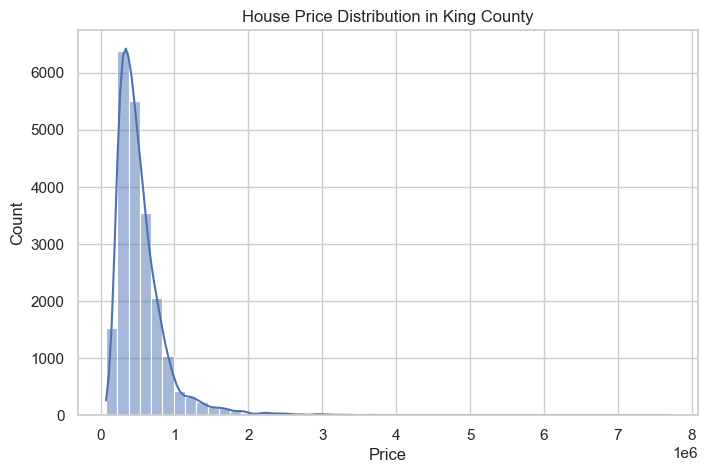

In [ ]:
#Distribution of House Prices in King County
sns.histplot(df_merged["price"], bins=50, kde=True)
plt.title("House Price Distribution in King County")
plt.xlabel("Price")
plt.show()


In [10]:
corr_cols = ["price", "sqft_living", "bedrooms", "bathrooms",
             "public_school_count", "private_school_count", "hospital_count"]

corr = df_merged[corr_cols].corr()
corr


,price,sqft_living,bedrooms,bathrooms,public_school_count,private_school_count,hospital_count
price,1.000000,0.702035,0.308350,0.525138,-0.261153,0.203894,0.035361
sqft_living,0.702035,1.000000,0.576671,0.754665,-0.067858,0.045025,-0.008351
bedrooms,0.308350,0.576671,1.000000,0.515884,0.034344,0.047614,0.009145
bathrooms,0.525138,0.754665,0.515884,1.000000,-0.054585,0.030415,0.001801
public_school_count,-0.261153,-0.067858,0.034344,-0.054585,1.000000,0.200829,0.180094
private_school_count,0.203894,0.045025,0.047614,0.030415,0.200829,1.000000,0.161195
hospital_count,0.035361,-0.008351,0.009145,0.001801,0.180094,0.161195,1.000000


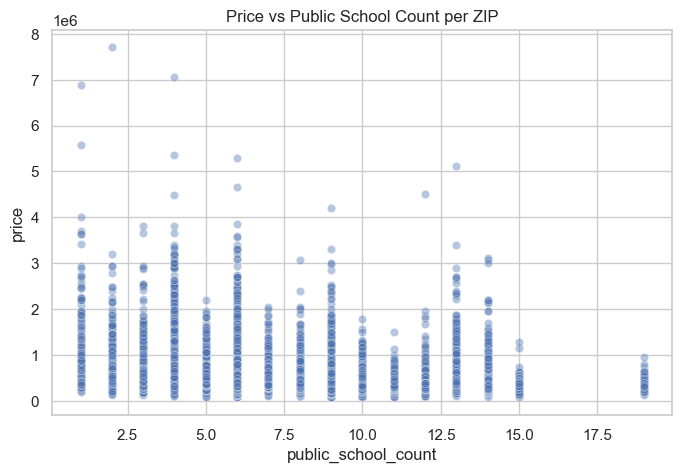

In [11]:
sns.scatterplot(data=df_merged, x="public_school_count", y="price", alpha=0.4)
plt.title("Price vs Public School Count per ZIP")
plt.show()


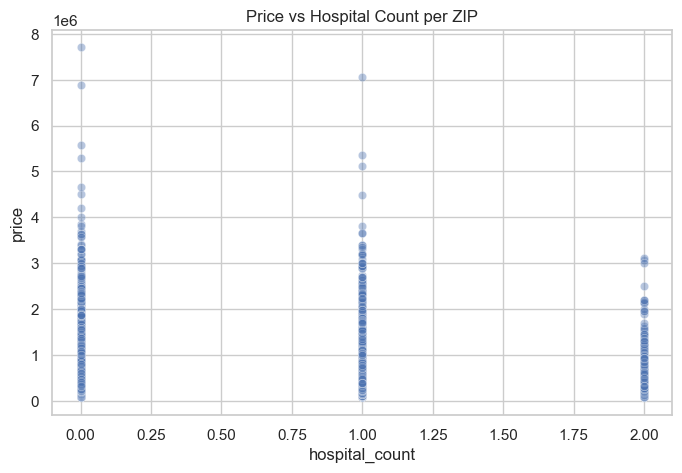

In [12]:
sns.scatterplot(data=df_merged, x="hospital_count", y="price", alpha=0.4)
plt.title("Price vs Hospital Count per ZIP")
plt.show()


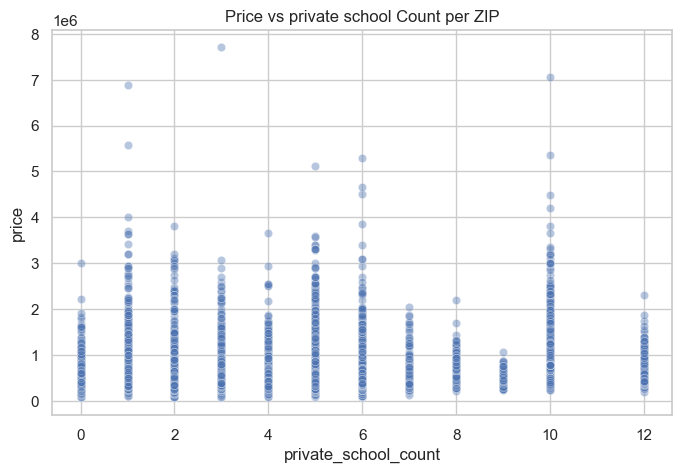

In [13]:
sns.scatterplot(data=df_merged, x="private_school_count", y="price", alpha=0.4)
plt.title("Price vs private school Count per ZIP")
plt.show()

In [ ]:
#Hypothesis Test: Public School Density vs. House Prices
from scipy.stats import ttest_ind, pearsonr

# Correlation between public school count and price
r, p = pearsonr(df_merged["public_school_count"], df_merged["price"])
print("Pearson r (public_school_count vs price):", r)
print("p-value:", p)

# High vs low school density groups
median_school_count = df_merged["public_school_count"].median()

high_school_zip = df_merged[df_merged["public_school_count"] > median_school_count]["price"]
low_school_zip  = df_merged[df_merged["public_school_count"] <= median_school_count]["price"]

t, p_val = ttest_ind(high_school_zip, low_school_zip, equal_var=False)
print("t-statistic:", t)
print("p-value:", p_val)
len(high_school_zip), len(low_school_zip)


Pearson r (public_school_count vs price): -0.26115315971405045
p-value: 0.0
t-statistic: -35.04801119824592
p-value: 8.737042813533288e-262


(8941, 12672)

In [ ]:
#Hypothesis Test: Hospital Availability vs. House Prices
from scipy.stats import ttest_ind, pearsonr

# Correlation between hospital_count and price
r, p = pearsonr(df_merged["hospital_count"], df_merged["price"])
print("Pearson r (hospital_count vs price):", r)
print("p-value:", p)

# High vs low school density groups
median_school_count = df_merged["hospital_count"].median()

high_school_zip = df_merged[df_merged["hospital_count"] > median_school_count]["price"]
low_school_zip  = df_merged[df_merged["hospital_count"] <= median_school_count]["price"]

t, p_val = ttest_ind(high_school_zip, low_school_zip, equal_var=False)
print("t-statistic:", t)
print("p-value:", p_val)
len(high_school_zip), len(low_school_zip)


Pearson r (hospital_count vs price): 0.035361131317539644
p-value: 1.994034843304723e-07
t-statistic: 8.818888439072298
p-value: 1.3177748157779323e-18


(6956, 14657)

In [16]:
from scipy.stats import ttest_ind, pearsonr

# Correlation between private_school_count and price
r, p = pearsonr(df_merged["private_school_count"], df_merged["price"])
print("Pearson r (private_school_count vs price):", r)
print("p-value:", p)

# High vs low school density groups
median_school_count = df_merged["private_school_count"].median()

high_school_zip = df_merged[df_merged["private_school_count"] > median_school_count]["price"]
low_school_zip  = df_merged[df_merged["private_school_count"] <= median_school_count]["price"]

t, p_val = ttest_ind(high_school_zip, low_school_zip, equal_var=False)
print("t-statistic:", t)
print("p-value:", p_val)
len(high_school_zip), len(low_school_zip)

Pearson r (private_school_count vs price): 0.2038943682699377
p-value: 1.4499694005883727e-201
t-statistic: 27.22485000237467
p-value: 2.2298230630108078e-159


(8764, 12849)

In [ ]:
#Filtering Gun Violence Incidents for Selected King County Cities
king_cities = [
    "Seattle", "Bellevue", "Redmond", "Kirkland", "Renton",
    "Kent", "Auburn", "Federal Way", "Shoreline", "Burien",
    "Sammamish", "Issaquah", "Bothell", "Mercer Island"
]

df_incidents_king = df_incidents[
    (df_incidents["state"] == "Washington") &
    (df_incidents["city"].isin(king_cities))
]

len(df_incidents_king), df_incidents_king.head()


(1706,
       incident_id        date       state         city  \
 199       2314014  2022-05-26  Washington      Seattle   
 849       2309221  2022-05-21  Washington  Federal Way   
 1092      2306464  2022-05-19  Washington  Federal Way   
 1807      2303363  2022-05-14  Washington       Renton   
 1942      2301588  2022-05-13  Washington      Seattle   
 
                                address  n_killed  n_injured  
 199   8th Ave S and S Massachusetts St         0          1  
 849                    2200 S 333rd St         0          1  
 1092      1200 block of South 336th St         0          1  
 1807    Glennwood Ave NE and NE 9th St         0          1  
 1942       2600 block of SW Andover St         0          1  )

<Axes: xlabel='year', ylabel='incident_count'>

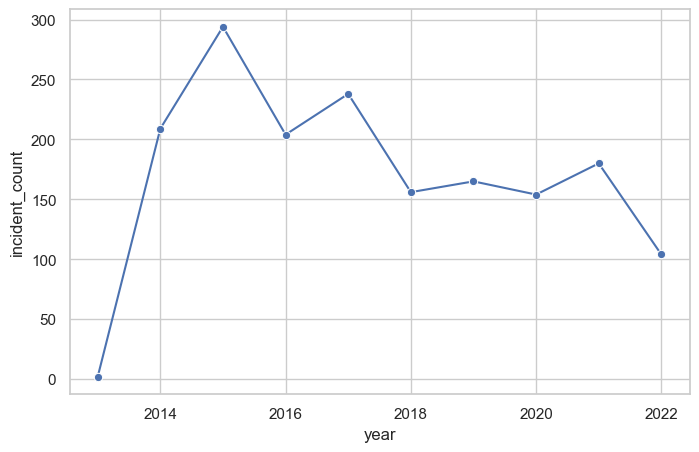

In [ ]:
#Annual Gun Violence Incident Trends in King County Cities
df_incidents_king = df_incidents_king.copy()

df_incidents_king.columns = df_incidents_king.columns.str.strip()

df_incidents_king["date"] = pd.to_datetime(
    df_incidents_king["date"].astype(str),
    errors="coerce"
)

df_incidents_king = df_incidents_king.dropna(subset=["date"])

df_incidents_king["year"] = df_incidents_king["date"].dt.year

incidents_per_year = (
    df_incidents_king
    .groupby("year")
    .size()
    .reset_index(name="incident_count")
)

sns.lineplot(data=incidents_per_year, x="year", y="incident_count", marker="o")



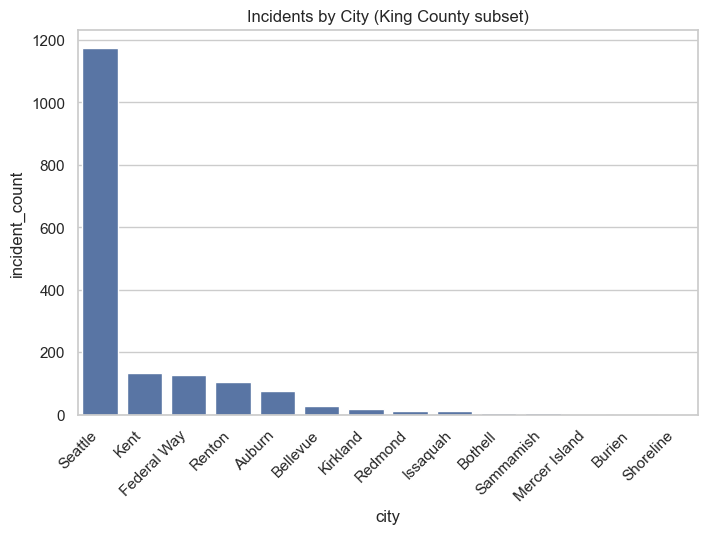

In [ ]:
#Gun Violence Incident Counts by City in King County
incidents_by_city = (
    df_incidents_king
    .groupby("city")
    .size()
    .reset_index(name="incident_count")
    .sort_values("incident_count", ascending=False)
)

sns.barplot(data=incidents_by_city, x="city", y="incident_count")
plt.xticks(rotation=45, ha="right")
plt.title("Incidents by City (King County subset)")
plt.show()


In [ ]:
df_merged.to_csv("data/clean/king_county_merged.csv", index=False)


In [ ]:
# Phase 3 – Regression Modeling and Interpretation

In [24]:
import numpy as np
import statsmodels.api as sm


In [25]:
# Select variables for regression
model_df = df_merged[
    [
        "price",
        "sqft_living",
        "bedrooms",
        "bathrooms",
        "grade",
        "public_school_count",
        "private_school_count",
        "hospital_count"
    ]
].dropna()


In [26]:
## 3.1 Baseline Model: Structural Housing Features
X_base = model_df[
    ["sqft_living", "bedrooms", "bathrooms", "grade"]
]
X_base = sm.add_constant(X_base)

y = model_df["price"]

model_base = sm.OLS(y, X_base).fit()
model_base.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6428.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:07:57   Log-Likelihood:            -2.9913e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.784e+05   1.49e+04    -32.121      0.000   -5.08e+05   -4.49e+05
sqft_living   226.6532      3.577     63.362      0.000     219.642     233.665
bedrooms    -3.931e+04   2290.774    -17.158      0.000   -4.38e+04   -3.48e+04
bathrooms   -2.674e+04   3480.127     -7.683      0.000   -3.36e+04   -1.99e+04
grade        9.614e+04   2315.488     41.520      0.000    9.16e+04    1.01e+05
==============================================================================
Omnibus:                    16494.728   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           899398.070
Skew:                           3.184   Prob(JB):                         0.00
Kurtosis:                      33.954   Cond. No.                     2.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_full = model_df[
    ["sqft_living", "bedrooms", "bathrooms", "grade",
     "public_school_count", "private_school_count", "hospital_count"]
]
X_full = sm.add_constant(X_full)

model_full = sm.OLS(model_df["price"], X_full).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     5110.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:11:44   Log-Likelihood:            -2.9705e+05
No. Observations:               21613   AIC:                         5.941e+05
Df Residuals:                   21605   BIC:                         5.942e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.788e+05   1.41e+04    -19.717      0.000   -3.07e+05   -2.51e+05
sqft_living            229.9121      3.251     70.715      0.000     223.539     236.285
bedrooms             -3.511e+04   2087.562    -16.819      0.000   -3.92e+04    -3.1e+04
bathrooms            -2.229e+04   3162.906     -7.046      0.000   -2.85e+04   -1.61e+04
grade                 7.709e+04   2124.699     36.282      0.000    7.29e+04    8.13e+04
public_school_count  -2.373e+04    421.643    -56.274      0.000   -2.46e+04   -2.29e+04
private_school_count  2.509e+04    543.827     46.131      0.000     2.4e+04    2.62e+04
hospital_count        3.207e+04   2416.987     13.270      0.000    2.73e+04    3.68e+04
==============================================================================
Omnibus:                    18735.215   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1556158.035
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                      43.884   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
print("Baseline R²:", model_base.rsquared)
print("Full Model R²:", model_full.rsquared)


Baseline R²: 0.5433509785456612
Full Model R²: 0.6234548676490106


In [30]:
## 3.4 Log-Price Regression Model
model_df["log_price"] = np.log(model_df["price"])

y_log = model_df["log_price"]

model_log = sm.OLS(y_log, X_full).fit()
model_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     6620.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:12:48   Log-Likelihood:                -4428.5
No. Observations:               21613   AIC:                             8873.
Df Residuals:                   21605   BIC:                             8937.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5997      0.019    622.143      0.000      11.563      11.636
sqft_living              0.0002   4.29e-06     56.701      0.000       0.000       0.000
bedrooms                -0.0104      0.003     -3.782      0.000      -0.016      -0.005
bathrooms               -0.0050      0.004     -1.205      0.228      -0.013       0.003
grade                    0.1503      0.003     53.672      0.000       0.145       0.156
public_school_count     -0.0434      0.001    -78.066      0.000      -0.044      -0.042
private_school_count     0.0442      0.001     61.652      0.000       0.043       0.046
hospital_count           0.0524      0.003     16.457      0.000       0.046       0.059
==============================================================================
Omnibus:                      243.685   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.103
Skew:                           0.140   Prob(JB):                     2.57e-76
Kurtosis:                       3.555   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""